In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
from subprocess import check_output
df = pd.read_csv('rainregion1_updCSV.csv')
df.info()
df.dropna(how='any', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3954 entries, 0 to 3953
Data columns (total 23 columns):
SUBDIVISION         3954 non-null object
YEAR                3954 non-null int64
ANNUAL              3928 non-null float64
NEXTANNUAL          3895 non-null float64
JAN                 3950 non-null float64
FEB                 3951 non-null float64
MAR                 3948 non-null float64
APR                 3950 non-null float64
MAY                 3951 non-null float64
JUN                 3949 non-null float64
JUL                 3947 non-null float64
AUG                 3950 non-null float64
SEP                 3948 non-null float64
OCT                 3947 non-null float64
NOV                 3943 non-null float64
DEC                 3944 non-null float64
Region              3954 non-null int64
MEAN_ANNUAL_TEMP    3954 non-null float64
MAX_ANNUAL_TEMP     3954 non-null float64
MIN_ANNUAL_TEMP     3954 non-null float64
G.Area              3954 non-null object
RFA              

In [3]:
df.head()

,SUBDIVISION,YEAR,ANNUAL,NEXTANNUAL,JAN,FEB,MAR,APR,MAY,JUN,...,OCT,NOV,DEC,Region,MEAN_ANNUAL_TEMP,MAX_ANNUAL_TEMP,MIN_ANNUAL_TEMP,G.Area,RFA,NAPREDICT
0,Andaman & Nicobar Islands,1901,3373.2,3520.7,49.2,87.1,29.2,2.3,528.8,517.5,...,388.5,558.2,33.6,1,24.23,28.96,19.51,8249,7171,1.0
1,Andaman & Nicobar Islands,1902,3520.7,2957.4,0.0,159.8,12.2,0.0,446.1,537.1,...,197.2,359.0,160.5,1,24.33,29.22,19.44,8249,7171,1.0
2,Andaman & Nicobar Islands,1903,2957.4,3079.6,12.7,144.0,0.0,1.0,235.1,479.9,...,181.2,284.4,225.0,1,23.80,28.47,19.25,8249,7171,1.0
3,Andaman & Nicobar Islands,1904,3079.6,2566.7,9.4,14.7,0.0,202.4,304.5,495.1,...,222.2,308.7,40.1,1,23.86,28.49,19.22,8249,7171,0.0
4,Andaman & Nicobar Islands,1905,2566.7,2534.4,1.3,0.0,3.3,26.9,279.5,628.7,...,260.7,25.4,344.7,1,23.71,28.30,19.03,8249,7171,0.0


In [4]:
df2=df

## FUNCTION TO CALCULATE FEATURE IMPORTANCE

In [3]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

## RandomForestRegressor MODEL

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
y = df.NEXTANNUAL
X = df.drop(['SUBDIVISION','NAPREDICT','NEXTANNUAL'],axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.8, random_state = 42)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15,15)})

In [7]:
from sklearn.ensemble import RandomForestRegressor
global rf
rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

## ACCURACY SCORE OF RANDOM FOREST REGRESSOR.

In [8]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                    rf.oob_score_,
                                                                                    rf.score(X_valid, y_valid)))

R^2 Training Score: 0.98 
OOB Score: 0.88 
R^2 Validation Score: 0.85


## Interactive USER INPUT FUNCTION 

In [9]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display


In [10]:
df3=pd.read_csv('rainregion1_updCSV.csv')
df2=df

In [24]:
list1=[]
global l
global a
global year
global region
global yr
l=[]

def userinput(REGION):
    region=REGION
    if(yr<=2018):
        Y=yr-1
        A=df3.loc[(df3['SUBDIVISION'] == REGION ) & (df3['YEAR'] == Y )]
        b=A.drop(['SUBDIVISION','NEXTANNUAL','NAPREDICT'],axis=1)
        inputvect = b.values.tolist()
        result=rf.predict(inputvect)
        re=int(result)
        display(print("Expected annual rainfall in {} during year {} is {} mm ".format(REGION,yr,re)))
def validyr(yr):
    pass
def custominput(region,a):
    hl=a
    J=[]
    A=df3.loc[(df3['SUBDIVISION'] == region ) & (df3['YEAR'] == 2015 )]
    b=A[['Region','G.Area','RFA']].values.tolist()
    print(b)
    for i in b[0]:
        j=int(i)
        J.append(j)
    hl.insert(14,J[0])
    for i in J[1:]:
        hl.append(i)
    l1=[hl]
    result=rf.predict(l1)
    re=int(result)
    display(print("Expected annual rainfall in {} during year {} is {} mm ".format(region,yr,re)))
    return print("Expected annual rainfall in {} during year {} is {} mm ".format(region,yr,re))

def vectinput(list1,l):
    annual=sum(list1[1:13])
    MEAN_ANNUAL_TEMP=sum(list1[13:15])
    l.append(list1[0])
    l.append(annual)
    for elem in list1[1:13]:
        l.append(elem)
    l.append(MEAN_ANNUAL_TEMP)
    for i in list1[13:15]:
        l.append(i)
    return l

def validyr(yr):
    if(yr > 2018):
        print("DATA NOT AVAILABLE,please enter the data for year {}".format(yr-1))
        for i in range(15):
            x=int(input())
            list1.append(x)
        a=vectinput(list1,l)
        print("Enter the region you want prediction from")
        region=input()
        custominput(region,a)
        return a
    else:
        w=interactive(userinput, REGION=df2.SUBDIVISION.unique());
        display(w)
        
yr=int(input())
list1=[]
validyr(yr)

2018


interactive(children=(Dropdown(description='REGION', options=('Andaman & Nicobar Islands', 'Arunachal Pradesh'…

NameError: name 'REGION' is not defined

In [12]:
base_imp = imp_df(X_train.columns, rf.feature_importances_)
base_imp


,feature,feature_importance
0,ANNUAL,0.840829
1,G.Area,0.036403
2,JUL,0.022216
3,APR,0.010365
4,DEC,0.010037
5,SEP,0.008538
6,MAY,0.007598
7,MAR,0.007157
8,YEAR,0.006226
9,JUN,0.005967


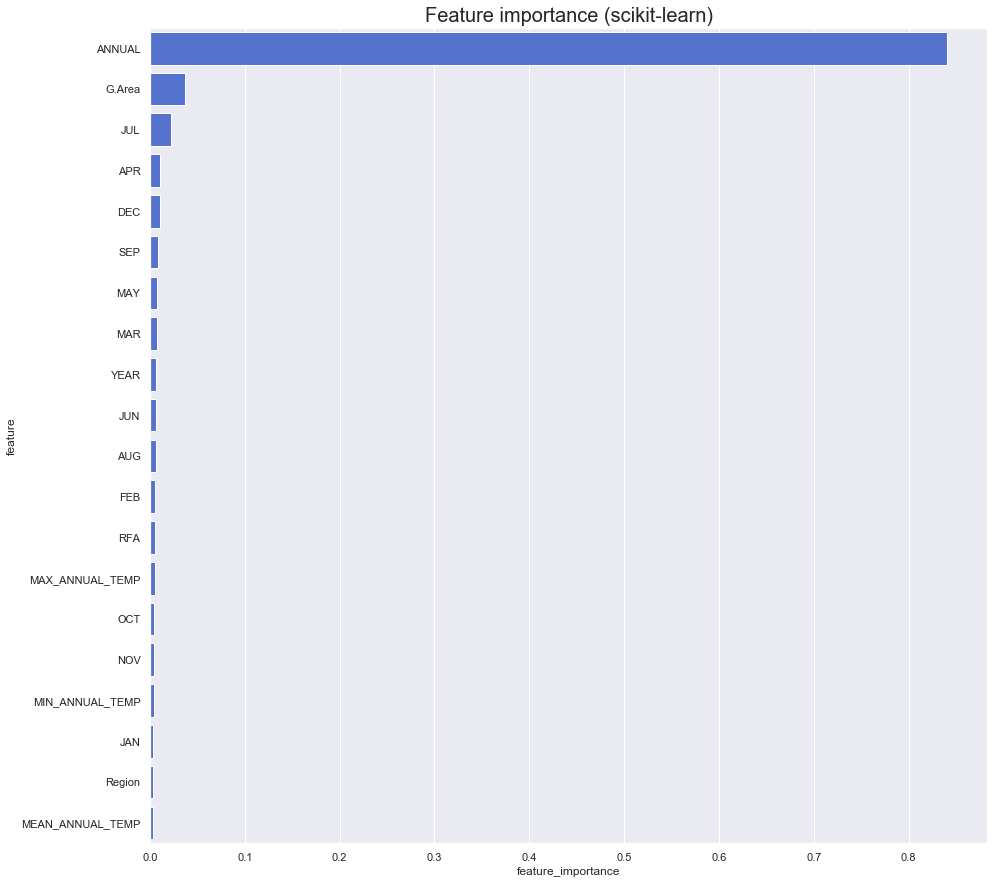

In [13]:
var_imp_plot(base_imp, 'Feature importance (scikit-learn)')

## CLASSIFIER

## 1)NAVIE BBAYES -GAUSSAIN

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
gnb = GaussianNB()

In [16]:
y1 = df2.NAPREDICT
X1=X
X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [21]:
gnb.fit(X1_train,y1_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
y1_pred=gnb.predict(X1_valid)

In [30]:
gnb.score(X1_valid,y1_valid)

0.5968586387434555

## Accuracy of NAVIE BAIS CLASSIFIER

In [31]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_valid, y1_pred))

Accuracy: 0.5968586387434555


## Train_Test_split FOR RANDOM FOREST CLASSIFIER

In [14]:
y2 = df2.NAPREDICT
X2 = X
X2_train, X2_valid, y2_train, y2_valid = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

## 2) Random forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
# Fit on training data
model.fit(X2_train, y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
rf_predictions = model.predict(X2_valid)
# Probabilities for each class
rf_probs = model.predict_proba(X2_valid)[:, 1]

In [17]:
from sklearn.metrics import roc_auc_score

# Calculate roc auc
roc_value = roc_auc_score(y2_valid, rf_probs)

In [18]:
roc_value

0.740903890160183

## MODEL ACCURACY OF Random Forest classifier

In [19]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y2_valid,rf_predictions))

Accuracy: 0.6832460732984293


In [20]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [21]:
from IPython.display import display
def userinput(REGION, YEAR):
    A=df3.loc[(df3['SUBDIVISION'] == REGION) & (df3['YEAR'] == YEAR )]
    b=A.drop(['SUBDIVISION','NEXTANNUAL','NAPREDICT'],axis=1)
    inputvect = b.values.tolist()
    result=model.predict(inputvect)
    display(result)
    if (result==1):
        print("Heavy raainfall expected .")
    else:
        print("Low rainfall is expected")
    return (REGION, YEAR) 



w=interactive(userinput, REGION=df2.SUBDIVISION.unique(), YEAR=sorted(df3.YEAR.unique()));
display(w)

interactive(children=(Dropdown(description='REGION', options=('Andaman & Nicobar Islands', 'Arunachal Pradesh'…

## Feature importance for Random Forest Classifier

In [43]:
 #Calculate feature importances
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

In [44]:
names = [X_train.columns[i] for i in indices]


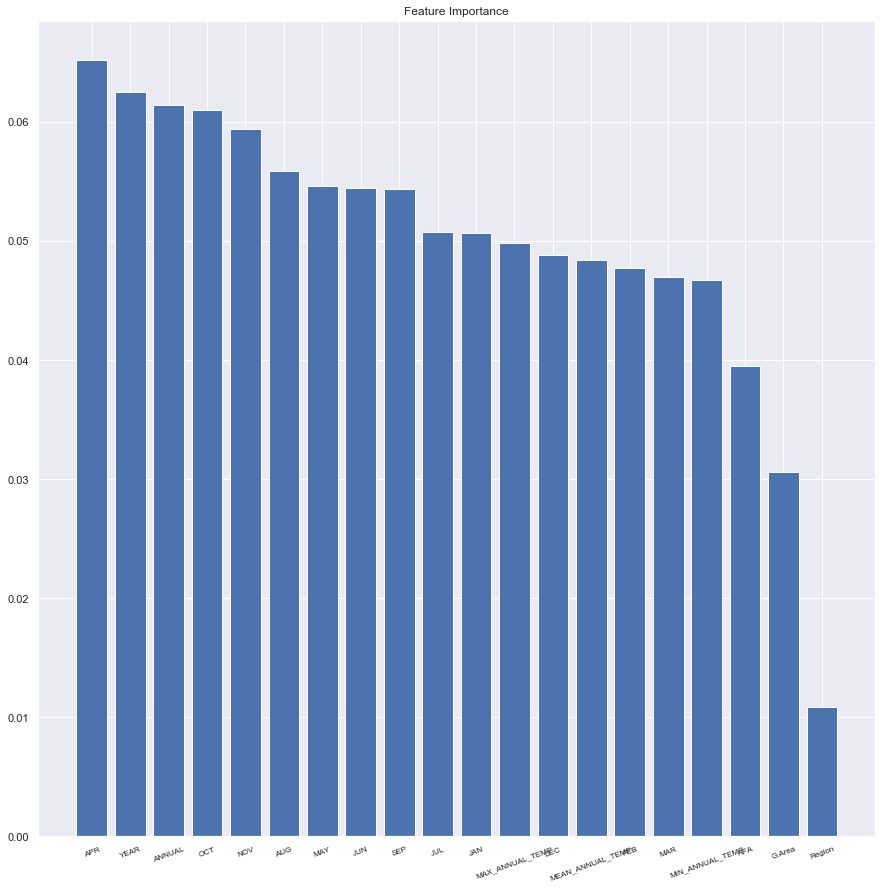

In [45]:
# Barplot: Add bars
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=20, fontsize = 8)
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()